<a href="https://colab.research.google.com/github/mateosuster/pythonungs/blob/master/MPE_III_Intro_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

* [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) es una biblioteca de código abierto que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar para el lenguaje de programación Python. Es una de las librerías más usadas para este tipo de tareas.

* Nombre derivado de "**Pan**el **Da**ta **S**ystem" (término econométrico para datasets multidimensionales).

* Su funcionalidad permite hacer operaciones sobre datos que se encuentran en memoria de manera eficiente. Combina la alta performance de las operaciones sobre arrays de NumPy con la flexibilidad en la manipulación datasets (Excel, CSV, Google Spreadsheets, etc., etc.) o una base de datos relacional (SQL).


In [1]:
#Como buena práctica, iniciamos importando las librerías
import pandas as pd
import numpy as np

## Exploración

Vamos a analizar datos de una fuente real. Los ingresos de los funcionarios son información pública que se libera anualmente en el <a href='https://data.buenosaires.gob.ar/dataset/sueldo-funcionarios'>portal de datos abiertos</a> de GCBA.  

En general los 4 primeros pasos para analizar un data set son:
1. Leerlo
2. Consultar cuáles son las columnas
3. Extraer una muestra
4. Verificar cuántos registros tiene


### 1- Para leer el data set usamos la función de pandas `read_csv()`


Con esta función podemos leer archivos que estén en una url pública o en una ubicación del disco accesible desde la Jupyter Notebook. 

In [2]:
df = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/sueldo-funcionarios/sueldo_funcionarios_2019.csv')

### 2- Consultamos las columnas


In [3]:
df.columns

Index(['cuil', 'anio', 'mes', 'funcionario_apellido', 'funcionario_nombre',
       'reparticion', 'asignacion_por_cargo_i', 'aguinaldo_ii',
       'total_salario_bruto_i_+_ii', 'observaciones'],
      dtype='object')

### 3- Extraemos una muestra

In [5]:
df.sample(5)

,cuil,anio,mes,funcionario_apellido,funcionario_nombre,reparticion,asignacion_por_cargo_i,aguinaldo_ii,total_salario_bruto_i_+_ii,observaciones
57,20-22709722-2,2019,2,LOPEZ,MATIAS,SECR Desarrollo Ciudadano,204017.27,0.00,204017.27,NaN
339,27-26690980-8,2019,11,UHALDE,MARIA PAULA,SECR Cultura Ciudadana y Función Pública,249972.87,0.00,249972.87,NaN
240,27-30744939-6,2019,8,FERRERO,GENOVEVA,SECR Administración de Seguridad y Emergencias,239470.36,0.00,239470.36,NaN
88,20-22709722-2,2019,3,LOPEZ,MATIAS,SECR Desarrollo Ciudadano,210061.14,0.00,210061.14,NaN
177,20-22293622-6,2019,6,FERNANDEZ,DIEGO HERNAN,SECR Integración Social y Urbana,226866.41,113433.21,340299.62,NaN


### 4- Consultamos la cantidad de filas y de columnas

In [6]:
# La propiedad shape nos devuelve una tupla (filas,columnas)
df.shape

(385, 10)

## Vectorización en Pandas
Pandas es útil para trabajar sobre datos tabulares, con dos condiciones importantes:

I. Los datos se encuentran enteramente en la memoria RAM. Con lo cual, el tamaño de los datos que podemos manipular está limitado por el hardware. Como regla de pulgar, es una buena práctica no ocupar más de 1/3 de la memoria RAM de nuestro dispositivo con el dataset. Así, si estamos trabajando localmente en una notebook con 8GB de memoria RAM no es recomendable procesar datasets de más de 2.33GB.

II. En pandas, las operaciones sobre filas y columnas son, en general, eficientes porque se hacen de forma "vectorizada". En realidad esta optimización, se hace desde numpy, una librería para realizar operaciones matemáticas que se utilizó a su vez para escribir pandas. 

Las operaciones vectorizadas son las que se realizan en bloque en vez de caso por caso. Las computadoras de hoy tienen la capacidad de recibir muchas instrucciones juntas y procesar varias de ellas a la vez. Por ejemplo, si nuestro hardware tiene la capacidad de procesar 4 operaciones juntas, el resultado de vectorizar una operación matemática es el siguiente:

<img src = 'https://datasets-humai.s3.amazonaws.com/images/vectorizacion.png' /> 


En el primer caso hay que hacer 5 operaciones y en el segundo caso sólo dos.

Es importante entender, entonces, que Pandas trabaja de esta manera y que por eso es una de las herramientas más elegidas para manipular datos en memoria.

## Los objetos fundamentales de Pandas

### Series

Las *Series* son un vector unidimensional, el objeto "más simple" que encontramos en Pandas. En el fondo, podemos pensar a las series como "columnas" de una tabla que están asociadas a un índice y a un nombre. Igual que una lista común de Python es una secuencia de elementos ordenados, pero a diferencia de la lista está asociada a más información.

In [7]:
# Las series se pueden crear a partir de una lista
serie = pd.Series(['a','b','c'])

In [8]:
# Propiedades importantes de las series
print('Tipo de objetos que tiene ', serie.dtype)
print('Nombre ', serie.name)
print('Index ',serie.index)
print('Valores ',serie.values)


Tipo de objetos que tiene  object
Nombre  None
Index  RangeIndex(start=0, stop=3, step=1)
Valores  ['a' 'b' 'c']


### DataFrame 

El principal objeto en Pandas son los DataFrames, los cuales son una estructura de datos tabular (o simplemente "tablas"), compuestas por una colección de "columnas" o series que **comparten todas un mismo índice**. Cada columna puede poseer un tipo de determinado de dato distinto (number, string, boolean, etc.).  

Los DataFrames tienen un objeto Index que describe los nombres de columnas y otro objeto Index que describen los nombres de las filas.

En general los DataFrames se crean a partir de leer tablas de archivos (pueden ser en formato json, csv o incluso xlsx) pero a veces también se crean a partir de listas de diccionarios o de otras maneras. Veamos algunas de ellas.

<br>

* Diccionario con listas:
<br>

```
{Nombre columna: [Valores]}
```

In [9]:
name_age = {'Name' : ['Ali', 'Bill', 'David', 'Hany', 'Ibtisam'], 'Age' : [32, 55, 20, 43, 30]}
print("name_age es", type(name_age))
print(name_age)

name_age es <class 'dict'>
{'Name': ['Ali', 'Bill', 'David', 'Hany', 'Ibtisam'], 'Age': [32, 55, 20, 43, 30]}


In [10]:
data_frame = pd.DataFrame(name_age)
print("data_frame es", type(data_frame))
data_frame.head(4)

data_frame es <class 'pandas.core.frame.DataFrame'>


,Name,Age
0,Ali,32
1,Bill,55
2,David,20
3,Hany,43


* Lista de Diccionarios: 
<br>

```
[{Columna1: valor, Columna2: valor}, 
{Columna1: valor, Columna2: valor}]
```

Cada elemento de la lista corresponde a una fila

In [11]:
name_age = [{'Name': 'Ali','Age':32},
            {'Name': 'Bill','Age':55},
            {'Name': 'David','Age':20},
            {'Name': 'Hany','Age':43},
            {'Name': 'Ibtisam','Age':30}]

print("name_age es", type(name_age))
print(name_age)

name_age es <class 'list'>
[{'Name': 'Ali', 'Age': 32}, {'Name': 'Bill', 'Age': 55}, {'Name': 'David', 'Age': 20}, {'Name': 'Hany', 'Age': 43}, {'Name': 'Ibtisam', 'Age': 30}]


In [12]:
data_frame = pd.DataFrame(name_age)
print("data_frame es", type(data_frame))
data_frame

data_frame es <class 'pandas.core.frame.DataFrame'>


,Name,Age
0,Ali,32
1,Bill,55
2,David,20
3,Hany,43
4,Ibtisam,30


* Lista de listas: 

<br>
[  [valor<sub>11</sub>, valor<sub>12</sub>],
<br>
[valor<sub>21</sub>, valor<sub>22</sub>], 
<br>...<br>
[valor<sub>n1</sub>, valor<sub>n2</sub>] ] 
<br>
<br>
  Cada lista de la superlista corresponde a una fila u observación

In [13]:
name_age = [ ['Ali',32], ['Bill',55],
            ['David', 20], ['Hany',43],
            ['Ibtisam',30]  ]

print("name_age es", type(name_age))
print(name_age)

name_age es <class 'list'>
[['Ali', 32], ['Bill', 55], ['David', 20], ['Hany', 43], ['Ibtisam', 30]]


In [14]:
data_frame = pd.DataFrame(name_age, columns = ["Name", "Age"]) #con columns especificamos los nombres de columnas
print("data_frame es", type(data_frame))
data_frame

data_frame es <class 'pandas.core.frame.DataFrame'>


,Name,Age
0,Ali,32
1,Bill,55
2,David,20
3,Hany,43
4,Ibtisam,30


## Lectura de archivos

Otra manera de crear dataframes, es leyendo archivos con datos, en lugar de armarlos nosotros *a mano*. La librería pandas permite abrir y guardar los [dataframes en muchos formatos distintos](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) 

### Carga de Archivos

Lo primero que debemos resolver es cómo subir archivos a Google Colab. Veamos un ejemplo con los datos de [cotizaciones del dólar](https://datos.gob.ar/ru/dataset/sspm-tipo-cambio--usd---futuro-dolar). Existen múltiples maneras:

* Si tenemos una url, podemos descargarla directamente a Colab de la siguiente manera:



In [15]:
# Descargamos un dataset público
!wget https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv

--2022-05-13 23:11:43--  https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv
Resolving infra.datos.gob.ar (infra.datos.gob.ar)... 186.33.215.176
Connecting to infra.datos.gob.ar (infra.datos.gob.ar)|186.33.215.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 808585 (790K) [text/csv]
Saving to: ‘datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv’

datos-tipo-cambio-u 100%[===================>] 789.63K   946KB/s    in 0.8s    

2022-05-13 23:11:45 (946 KB/s) - ‘datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv’ saved [808585/808585]



* Otra opción es subir el archivo manualmente:

In [16]:
from google.colab import files

uploaded=files.upload()

* Por último, es posible acceder a Google Drive en colab:

In [17]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Una vez que tenemos el archivo que queremos en colab, podemos abrirlo con la función **read_csv**

In [32]:
dolar_df = pd.read_csv("/content/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv")
dolar_df

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7357,2022-04-26,119.75,114.8417,114.85,NaN,214.881623,115.30,2173037.0,121.00,740809.0,127.10,261824.0,133.00,192843.0,139.50,52932.0,145.50,60372.0
7358,2022-04-27,119.75,115.0050,115.04,NaN,208.698031,115.28,2141382.0,121.00,944708.0,127.14,312879.0,133.41,217803.0,140.38,66187.0,146.40,65231.0
7359,2022-04-28,119.75,115.1733,115.18,NaN,205.172414,115.30,1839555.0,120.96,1315908.0,127.18,350398.0,133.62,224907.0,140.80,66573.0,147.20,63426.0
7360,2022-04-29,120.25,115.3117,115.31,NaN,204.730473,115.31,1839555.0,120.73,2465967.0,127.05,361946.0,133.70,243283.0,141.30,63043.0,147.55,62675.0


Recuerden que también podemos leer el dataframe introduciendo el URL de descarga en la función `read_csv()`, tal como hicimos al principio. El siguiente bloque de código, que es un ejemplo de ello, tiene el mismo efecto que el anterior.



In [21]:
# dolar_df = pd.read_csv("https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv")
# dolar_df

Repasemos algunas propiedades importantes de los dataframes.

In [26]:
print('Columnas ', dolar_df.columns, end = "\n\n")
print('Index ', dolar_df.index, end = "\n\n")
print('Dimensiones ',dolar_df.shape, end = "\n\n")

Columnas  Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m'],
      dtype='object')

Index  RangeIndex(start=0, stop=7362, step=1)

Dimensiones  (7362, 18)



In [28]:
# Consultar las primeras filas
dolar_df.head()

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si queremos extraer una serie del DataFrame, podemos hacerlo de la misma forma en que extraemos un valor de un diccionario.



In [29]:
serie_fecha = dolar_df['indice_tiempo']

type(serie_fecha)

pandas.core.series.Series

Podemos explorar los datos del dataset con los [graficos de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

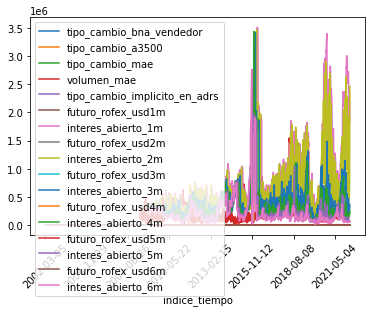

In [33]:
dolar_df.set_index(keys = "indice_tiempo", inplace=True) #definimos un indice de manera "inplace"
dolar_df.plot(rot = 45 )

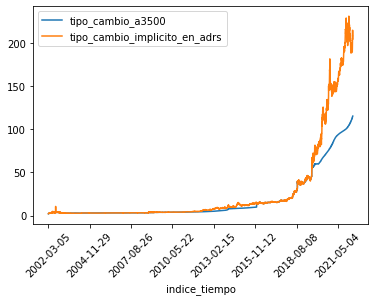

In [36]:
dolar_df= dolar_df[[ "tipo_cambio_a3500",  "tipo_cambio_implicito_en_adrs"]]
dolar_df.plot(rot = 45 )

## Índices

Los índices acompañan a las series y a los Data Frames. Son conjuntos ordenados e inmutables de elementos. Volvamos a levantar el dataset de salarios de funcionarios como ejemplo.

In [37]:
df = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/sueldo-funcionarios/sueldo_funcionarios_2019.csv')

In [38]:
df.index

RangeIndex(start=0, stop=385, step=1)

In [39]:
df.columns

Index(['cuil', 'anio', 'mes', 'funcionario_apellido', 'funcionario_nombre',
       'reparticion', 'asignacion_por_cargo_i', 'aguinaldo_ii',
       'total_salario_bruto_i_+_ii', 'observaciones'],
      dtype='object')

In [40]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [41]:
ind[1] = 0

TypeError: ignored

### Ejercicio Titanic exploratorio
Exploren el dataset público que se encuentra en la siguiente url: https://osf.io/aupb4/download ¿De qué se trata? ¿Cuántas filas tiene? ¿Cuántas columnas? Al leerlo, pueden almacenarlo en la variable df_titanic. 

## Filtrando un DataFrame (Indexing)

Hay muchas técnicas para filtrar un DataFrame. Podemos querer filtrar por columnas o por filas, por posición o por nombre. También podemos querer filtrar por condiciones que se cumplen o no. Cuando no queremos filtrar sobre una dimensión (filas o columnas) usamos ":" para seleccionar todo.

Existe un método muy práctico con el cual podemos acceder a filas y columnas que se realiza mediante las instrucciones **`.iloc[]`** (utilizando el número de índice/posición) o usando **`.loc[]`** (mediante el nombre del índice o columna).



```
#con .iloc (selección implícita)
NombreDataFrame.iloc[numero_filas, numero_columnas]

#con .loc (selección explícita)
NombreDataFrame.loc[nombre_indice, nombre_columnas]
```

![](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/10/Pandas-selections-and-indexing-1024x731.png)

## Manipulación de Data Frames


Recordemos que:
* Una *Series* es un objeto similar a un vector unidimensional
* Contiene un array de valores y un array asociado de etiquetas de estos valores denominado como **índice**.
* Una Serie también puede ser pensada como un diccionario de tamaño fijo con sus claves ordenadas.


<br>

Vamos a construir un data frame a partir de dos instancias de *Series*:

* area, a partir de un diccionario

* population, a partir de dos listas

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [ ]:
area.values

array([423967, 695662, 141297, 170312, 149995])

In [ ]:
area.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [ ]:
states_list = ['Illinois','Texas','New York', 'Florida', 'California']
states_pop = [12882135, 26448193, 19651127, 19552860, 38332521]
population = pd.Series(states_pop, index= states_list)

population

Illinois      12882135
Texas         26448193
New York      19651127
Florida       19552860
California    38332521
dtype: int64

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


Bien, ahora que tenemos un pequeño dataset de prueba, veamos algunas operaciones de manipulación básica de datos. Entre ellas: 

* Seleccionar y renombrar columnas 
* Seleccionar y renombrar índices
* Filtrar observaciones
* Crear nuevas columnas
* Agregar nuevas filas
* Revisar y eliminar duplicados
* Y muchas más...

### Operaciones básicas de filas y columnas

Primero veamos que columnas tenemos

In [ ]:
states.columns

Index(['population', 'area'], dtype='object')

* ¿Cómo seleccionamos una columna? Hay dos alternativas:

In [ ]:
states["area"]

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [ ]:
states.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [ ]:
type(states.area)

pandas.core.series.Series

* Podemos modificar todos los indices de la siguiente forma

In [ ]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [ ]:
states.index = ['San Juan','Formosa','Neuquén','Jujuy', 'La Pampa']
states

,population,area
San Juan,38332521,423967
Formosa,19552860,170312
Neuquén,12882135,149995
Jujuy,19651127,141297
La Pampa,26448193,695662


* Lo mismo con las columnas

In [ ]:
states.columns = ["poblacion", "superficie"]
states

,poblacion,superficie
San Juan,38332521,423967
Formosa,19552860,170312
Neuquén,12882135,149995
Jujuy,19651127,141297
La Pampa,26448193,695662


### Creación de nuevas columnas

* Podemos modificar valores de una DataFrame (o crear nuevas columnas)



In [ ]:
states['densidad'] = states['poblacion'] / states['superficie']
states

,poblacion,superficie,densidad
San Juan,38332521,423967,90.413926
Formosa,19552860,170312,114.806121
Neuquén,12882135,149995,85.883763
Jujuy,19651127,141297,139.076746
La Pampa,26448193,695662,38.018740


La asignación no es dinámica ⚡, es decir, si yo modifico una variable, las columnas que creamos como resultado de la misma no se modifican, dado que fue asignada en un estado anterior. Por ejemplo, si yo varío la población, la densidad no se modifica.

In [ ]:
states["superficie"] = states["superficie"]/1000
states

,poblacion,superficie,densidad
0,NaN,423.967,NaN
1,1.955286e+10,170.312,114.806121
2,1.288214e+10,149.995,85.883763
3,1.965113e+10,141.297,139.076746
4,NaN,695.662,NaN


Tambien podemos ordenar las columnas de la siguiente manera

In [ ]:
states[["densidad","superficie", "poblacion"]]

,densidad,superficie,poblacion
San Juan,90.413926,423967,38332521.0
Formosa,114.806121,170312,19552860.0
Neuquén,85.883763,149995,12882135.0
Jujuy,139.076746,141297,19651127.0
La Pampa,38.018740,695662,26448193.0


### Filtro de observaciones

Para filtrar observaciones hay dos maneras, las cuales poseen sutiles diferencias. 

* Primero veamos que ocurre cuando operamos con una condición lógica sobre una columna

In [ ]:
states.poblacion > 20000000

San Juan     True
Formosa     False
Neuquén     False
Jujuy       False
La Pampa     True
Name: poblacion, dtype: bool

En este caso,
```
states.poblacion > 20000000
```
genera un objeto Series con True en donde se cumple la condición y False donde no. Luego podemos quedarnos con solo las filas que cumplen la condición indexando el dataframe con este Series resultante.

Este vector de booleanos nos puede ser útil para filtrar observaciones

In [ ]:
states[states["poblacion"] > 20000000] 

,poblacion,superficie,densidad
San Juan,38332521.0,423967,90.413926
La Pampa,26448193.0,695662,38.018740


Podemos acceder a menos columnas invocándolas entre corchetes

In [ ]:
states[states["poblacion"] > 20000000][["densidad", "poblacion"]] 

,densidad,poblacion
San Juan,90.413926,38332521.0
La Pampa,38.018740,26448193.0


#### **`.loc`** e **`.iloc`**

* No obstante, existe un método más potente con el cual podemos acceder a también a las filas. Esto se realiza mediante **`.iloc[]`** utilizando el número de índice/posición o mediante el nombre del índice o columna usando **`.loc[]`**.



```
#con .iloc (selección implícita)
NombreDataFrame.iloc[numero_filas, numero_columnas]

#con .loc (selección explícita)
NombreDataFrame.loc[nombre_indice, nombre_columnas]
```

![](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/10/Pandas-selections-and-indexing-1024x731.png)

In [ ]:
states.iloc[:3, :1]

,poblacion
San Juan,38332521.0
Formosa,19552860.0
Neuquén,12882135.0


In [ ]:
states.loc[:'Neuquén', :'poblacion']

,poblacion
San Juan,38332521.0
Formosa,19552860.0
Neuquén,12882135.0


Podemos no especificar las filas o columnas a rescatar, y en ese caso devuelves todas por default

In [ ]:
states.loc["Formosa":'Neuquén']

,poblacion,superficie,densidad
Formosa,19552860.0,170312,114.806121
Neuquén,12882135.0,149995,85.883763


Si filtramos una sóla columna, el objeto que devuelve ya no es un data frame, sino un Series

In [ ]:
print(states.loc['Formosa'])
print('\n')
print(states.iloc[1])

poblacion     1.955286e+07
superficie    1.703120e+05
densidad      1.148061e+02
Name: Formosa, dtype: float64


poblacion     1.955286e+07
superficie    1.703120e+05
densidad      1.148061e+02
Name: Formosa, dtype: float64


* Podemos indexar un DataFrame usando loc y máscaras booleanas, de modo de filtrar observaciones. Realicemos el mismo filtro visto anteriormente


In [ ]:
states.loc[states.poblacion > 20000000 , ['densidad', 'poblacion']]

,densidad,poblacion
San Juan,90.413926,38332521.0
La Pampa,38.018740,26448193.0


La ventaja de utilizar .loc o .iloc es que podemos modificar esos valores específicos del dataset de la siguiente manera

In [ ]:
states.loc[states.poblacion > 20000000 , ["poblacion", 'densidad'] ] = np.nan
states

,poblacion,superficie,densidad
San Juan,NaN,423967,NaN
Formosa,19552860.0,170312,114.806121
Neuquén,12882135.0,149995,85.883763
Jujuy,19651127.0,141297,139.076746
La Pampa,NaN,695662,NaN


### Registración de nuevas observaciones

* Podemos agregar nuevas filas al final del dataset con la función `append()` que ya utilizamos con las listas. Por ejemplo, agreguemos una observación duplicada

In [ ]:
states = states.append({"poblacion":np.nan,	"superficie": 423.967,"densidad":	np.nan} , ignore_index= True)
states

,poblacion,superficie,densidad
0,NaN,423.967,NaN
1,1.955286e+10,170.312,114.806121
2,1.288214e+10,149.995,85.883763
3,1.965113e+10,141.297,139.076746
4,NaN,695.662,NaN
5,NaN,423.967,NaN


`ignore_index=True` ignorará el index del nuevo dataframe y le asignará un nuevo índice. Podemos reasignar los índices con la función `set_index()` que veremos próximamente.

### Tratamiento de duplicados

* Puede que nuestros datos tengan entradas duplicadas. Es fácil detectarlas usando el método **duplicated()** y borrarlas usando **drop_duplicates()**

In [ ]:
print('Dataframe original\n')
print(states)

print('\n¿Está duplicado?\n')
print(states.duplicated())

print('\nEntradas duplicadas\n')
print(states[states.duplicated()])

print('\nDataframe sin entradas duplicadas\n')
print(states.drop_duplicates())

Dataframe original

      poblacion  superficie    densidad
0           NaN     423.967         NaN
1  1.955286e+10     170.312  114.806121
2  1.288214e+10     149.995   85.883763
3  1.965113e+10     141.297  139.076746
4           NaN     695.662         NaN
5           NaN     423.967         NaN

¿Está duplicado?

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Entradas duplicadas

   poblacion  superficie  densidad
5        NaN     423.967       NaN

Dataframe sin entradas duplicadas

      poblacion  superficie    densidad
0           NaN     423.967         NaN
1  1.955286e+10     170.312  114.806121
2  1.288214e+10     149.995   85.883763
3  1.965113e+10     141.297  139.076746
4           NaN     695.662         NaN


Si queremos seguir operando con el dataset ya sin duplicados, podemos utilizar el parámetro `inplace=True`, dentro de la función `drop_duplicates()`. Esto permite no tener que redifinir la variable, sino que el cambio se hace "en el lugar". 

In [ ]:
states.drop_duplicates(inplace= True)
states

,poblacion,superficie,densidad
0,NaN,423967.0,NaN
1,19552860.0,170312.0,114.806121
2,12882135.0,149995.0,85.883763
3,19651127.0,141297.0,139.076746
4,NaN,695662.0,NaN


Esto es lo mismo que hacer lo siguiente

In [ ]:
states = states.drop_duplicates(inplace= False)
states

,poblacion,superficie,densidad
0,NaN,423967.0,NaN
1,19552860.0,170312.0,114.806121
2,12882135.0,149995.0,85.883763
3,19651127.0,141297.0,139.076746
4,NaN,695662.0,NaN


## Exploración y manipulación de datos de bonos 

Veamos algunas cotizaciones reales de [bonos argentinos](https://datos.gob.ar/dataset/sspm-titulos-publicos-deuda/archivo/sspm_179.1)

### Buscamos y cargamos los datos

In [ ]:
!wget https://infra.datos.gob.ar/catalog/sspm/dataset/179/distribution/179.1/download/titulos-publicos.csv

--2021-11-05 22:13:52--  https://infra.datos.gob.ar/catalog/sspm/dataset/179/distribution/179.1/download/titulos-publicos.csv
Resolving infra.datos.gob.ar (infra.datos.gob.ar)... 186.33.215.176
Connecting to infra.datos.gob.ar (infra.datos.gob.ar)|186.33.215.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1587473 (1.5M) [text/csv]
Saving to: ‘titulos-publicos.csv’

titulos-publicos.cs 100%[===================>]   1.51M  1.73MB/s    in 0.9s    

2021-11-05 22:13:54 (1.73 MB/s) - ‘titulos-publicos.csv’ saved [1587473/1587473]



In [ ]:
import pandas as pd 

df = pd.read_csv("/content/titulos-publicos.csv")
df.head(7)

,indice_tiempo,aa19_cotizacion,aa19_yield,aa19_dur,aa19_ppv_en_anios,aa21_cotizacion,aa21_yield,aa21_dur,aa21_ppv_en_anios,a2e2_cotizacion,a2e2_yield,a2e2_dur,a2e2_ppv_en_anios,a2e3_cotizacion,a2e3_yield,a2e3_dur,a2e3_ppv_en_anios,aa26_cotizacion,aa26_yield,aa26_dur,aa26_ppv_en_anios,a2e7_cotizacion,a2e7_yield,a2e7_dur,a2e7_ppv_en_anios,a2e8_cotizacion,a2e8_yield,a2e8_dur,a2e8_ppv_en_anios,dicy_cotizacion,dicy_yield,dicy_dur,dicy_ppv_en_anios,diy0_cotizacion,diy0_yield,diy0_dur,diy0_ppv_en_anios,pary_cotizacion,pary_yield,pary_dur,...,tc23_cotizacion,tc23_yield,tc23_dur,tc23_ppv_en_anios,pr13_cotizacion,pr13_yield,pr13_dur,pr13_ppv_en_anios,tc25p_cotizacion,tc25p_yield,tc25p_dur,tc25p_ppv_en_anios,dicp_cotizacion,dicp_yield,dicp_dur,dicp_ppv_en_anios,parp_cotizacion,parp_yield,parp_dur,parp_ppv_en_anios,cuap_cotizacion,cuap_yield,cuap_dur,cuap_ppv_en_anios,af19_cotizacion,af19_yield,af19_dur,af19_ppv_en_anios,a2m2_cotizacion,a2m2_yield,a2m2_dur,a2m2_ppv_en_anios,td21_cotizacion,td21_yield,td21_dur,td21_ppv_en_anios,tvpp_cotizacion,tvpy_cotizacion,tvpa_cotizacion,tvpe_cotizacion
0,2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,0.080265,8.953592,11.9868,NaN,NaN,NaN,NaN,252.0,0.084898,12.579070,...,NaN,NaN,NaN,NaN,149.00,0.128100,4.998972,6.0978,NaN,NaN,NaN,NaN,131.25,0.144516,7.526447,12.6360,47.50,0.118083,12.693837,19.0318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.145,50.85,50.7,57.00
1,2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,0.080347,8.948217,11.9840,670.0,0.085414,8.780469,12.6332,252.0,0.084958,12.573035,...,NaN,NaN,NaN,NaN,150.35,0.126190,5.009697,6.0951,NaN,NaN,NaN,NaN,133.75,0.141912,7.599752,12.6332,46.25,0.120308,12.563981,19.0290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.340,50.30,50.4,55.60
2,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,0.080371,8.944776,11.9812,673.0,0.084919,8.794155,12.6303,252.0,0.084976,12.569364,...,NaN,NaN,NaN,NaN,150.00,0.126773,5.002877,6.0923,NaN,NaN,NaN,NaN,134.25,0.141416,7.611532,12.6303,46.00,0.120784,12.534177,19.0263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.200,49.00,50.0,54.50
3,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698.0,0.080840,8.926541,11.9784,NaN,NaN,NaN,NaN,250.0,0.085730,12.523703,...,NaN,NaN,NaN,NaN,149.70,0.127286,4.996561,6.0895,NaN,NaN,NaN,NaN,134.95,0.140719,7.629280,12.6274,45.00,0.122647,12.425121,19.0235,71.5,0.138849,9.48201,21.9866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.080,47.25,48.1,52.25
6,2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.0,0.082192,8.879011,11.9756,NaN,NaN,NaN,NaN,250.0,0.085748,12.520021,...,NaN,NaN,NaN,NaN,150.00,0.126917,4.996442,6.0867,NaN,NaN,NaN,NaN,134.50,0.141201,7.612352,12.6245,44.50,0.123615,12.367285,19.0207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.750,44.00,45.4,50.30


In [ ]:
df.tail(3)

,indice_tiempo,aa19_cotizacion,aa19_yield,aa19_dur,aa19_ppv_en_anios,aa21_cotizacion,aa21_yield,aa21_dur,aa21_ppv_en_anios,a2e2_cotizacion,a2e2_yield,a2e2_dur,a2e2_ppv_en_anios,a2e3_cotizacion,a2e3_yield,a2e3_dur,a2e3_ppv_en_anios,aa26_cotizacion,aa26_yield,aa26_dur,aa26_ppv_en_anios,a2e7_cotizacion,a2e7_yield,a2e7_dur,a2e7_ppv_en_anios,a2e8_cotizacion,a2e8_yield,a2e8_dur,a2e8_ppv_en_anios,dicy_cotizacion,dicy_yield,dicy_dur,dicy_ppv_en_anios,diy0_cotizacion,diy0_yield,diy0_dur,diy0_ppv_en_anios,pary_cotizacion,pary_yield,pary_dur,...,tc23_cotizacion,tc23_yield,tc23_dur,tc23_ppv_en_anios,pr13_cotizacion,pr13_yield,pr13_dur,pr13_ppv_en_anios,tc25p_cotizacion,tc25p_yield,tc25p_dur,tc25p_ppv_en_anios,dicp_cotizacion,dicp_yield,dicp_dur,dicp_ppv_en_anios,parp_cotizacion,parp_yield,parp_dur,parp_ppv_en_anios,cuap_cotizacion,cuap_yield,cuap_dur,cuap_ppv_en_anios,af19_cotizacion,af19_yield,af19_dur,af19_ppv_en_anios,a2m2_cotizacion,a2m2_yield,a2m2_dur,a2m2_ppv_en_anios,td21_cotizacion,td21_yield,td21_dur,td21_ppv_en_anios,tvpp_cotizacion,tvpy_cotizacion,tvpa_cotizacion,tvpe_cotizacion
2796,2020-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2797,2020-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2798,2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7250.0,0.3179,3.14,6.89,NaN,NaN,NaN,NaN,4570.0,0.1612,7.21,...,259.0,0.0542,2.3,2.37,666.0,0.04,1.73,1.78,NaN,NaN,NaN,NaN,1980.0,0.0621,6.43,7.35,849.0,0.0766,10.63,12.49,1190.0,0.0806,11.94,16.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,0.4593,0.69,0.86,1.85,86.0,75.5,NaN


In [ ]:
df.columns

Index(['indice_tiempo', 'aa19_cotizacion', 'aa19_yield', 'aa19_dur',
       'aa19_ppv_en_anios', 'aa21_cotizacion', 'aa21_yield', 'aa21_dur',
       'aa21_ppv_en_anios', 'a2e2_cotizacion',
       ...
       'a2m2_dur', 'a2m2_ppv_en_anios', 'td21_cotizacion', 'td21_yield',
       'td21_dur', 'td21_ppv_en_anios', 'tvpp_cotizacion', 'tvpy_cotizacion',
       'tvpa_cotizacion', 'tvpe_cotizacion'],
      dtype='object', length=225)

Seleccionamos algunas variables de interés, dado que con 225 se torna dificultoso...

In [ ]:
df_sel =df[["indice_tiempo", "dicy_cotizacion", "pary_cotizacion", "ac17_cotizacion"]]

### Exploración inicial

In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indice_tiempo    2799 non-null   object 
 1   dicy_cotizacion  1801 non-null   float64
 2   pary_cotizacion  1771 non-null   float64
 3   ac17_cotizacion  769 non-null    float64
dtypes: float64(3), object(1)
memory usage: 87.6+ KB


In [ ]:
df_sel.dtypes

indice_tiempo       object
dicy_cotizacion    float64
pary_cotizacion    float64
ac17_cotizacion    float64
dtype: object

In [ ]:
df_sel.describe()

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
count,1801.000000,1771.000000,769.000000
mean,2970.292655,1433.169060,2844.229843
std,1908.004774,1141.915304,891.137608
min,603.000000,243.000000,1526.000000
25%,1530.000000,640.500000,1930.000000
50%,2435.000000,1038.000000,2870.000000
75%,4471.500000,2100.000000,3310.000000
max,9780.000000,5850.000000,5850.000000


### Variables tipo fecha

Detectamos que la variable de tiempo es tipo string ("object"). Podemos convertirla a una variable temporal la función [`date_time()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) de Pandas

In [ ]:
df_sel["indice_tiempo"] =  pd.to_datetime(df_sel["indice_tiempo"]) 
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   indice_tiempo    2799 non-null   datetime64[ns]
 1   dicy_cotizacion  1801 non-null   float64       
 2   pary_cotizacion  1771 non-null   float64       
 3   ac17_cotizacion  769 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 87.6 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Conversión columna a índice

Podemos setear a la variable temporal como índice de todo el dataset con `set_index()`. La inversa es `reset_index()`.

In [ ]:
df_sel.set_index(keys = "indice_tiempo", inplace = True)
df_sel.head(4)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2013-01-02,700.0,252.0,NaN
2013-01-03,700.0,252.0,NaN
2013-01-04,700.0,252.0,NaN
2013-01-05,NaN,NaN,NaN


### Ordenando valores por índice o columna

Con `sort_index()` podemos ordenar los valores por índice. Podemos usar [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) si deseamos ordenar por algun valor particular.

In [ ]:
df_sel.sort_index(inplace = True) #inplace me permite no tener que redefinir la variable
df_sel

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2013-01-02,700.0,252.0,NaN
2013-01-03,700.0,252.0,NaN
2013-01-04,700.0,252.0,NaN
2013-01-05,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN
...,...,...,...
2020-08-27,7850.0,4700.0,4700.0
2020-08-28,7701.0,4650.0,4650.0
2020-08-29,NaN,NaN,NaN


In [ ]:
df_sel.sort_values(by = ["dicy_cotizacion"], axis = 0, ascending=False)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2020-08-07,9780.0,5685.0,5800.0
2020-08-12,9639.5,5850.0,5765.0
2020-08-20,9600.0,5800.0,5745.0
2020-08-13,9560.0,5800.0,5715.0
2020-08-11,9555.0,5799.0,5770.0
...,...,...,...
2020-08-17,NaN,NaN,NaN
2020-08-22,NaN,NaN,NaN
2020-08-23,NaN,NaN,NaN


Podemos utilizar el indexado de `.loc` visto previamente

In [ ]:
df_sel.loc["2019-12-31":"2020-04-01", ["dicy_cotizacion", "pary_cotizacion"]]

,dicy_cotizacion,pary_cotizacion
indice_tiempo,,
2019-12-31,NaN,NaN
2020-01-01,NaN,NaN
2020-01-02,6400.0,3650.0
2020-01-03,6400.0,3600.0
2020-01-04,NaN,NaN
...,...,...
2020-03-28,NaN,NaN
2020-03-29,NaN,NaN
2020-03-30,4440.0,2436.0


In [ ]:
df_filtrado = df_sel.loc["2017-01-01":]
df_filtrado.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
               '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
               '2020-08-30', '2020-08-31'],
              dtype='datetime64[ns]', name='indice_tiempo', length=1339, freq=None)

### Aplicando funciones

* Podemos aplicar funciones sobre las series

In [ ]:
promedio = df_filtrado.mean()
promedio

dicy_cotizacion    4429.258144
pary_cotizacion    2234.801716
ac17_cotizacion    2844.229843
dtype: float64

In [ ]:
minimo = df_filtrado['dicy_cotizacion'].min()
minimo

2330.0

* Podemos aplicar una misma función a cada elemento del Series usando [**apply**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html). Por default, aplica la función a cada fila.

In [ ]:
df_filtrado.apply(np.log)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2017-01-01,NaN,NaN,NaN
2017-01-02,7.789869,6.916715,NaN
2017-01-03,7.784057,6.900731,NaN
2017-01-04,7.781556,6.904751,NaN
2017-01-05,7.779049,6.898715,NaN
...,...,...,...
2020-08-27,8.968269,8.455318,8.455318
2020-08-28,8.949105,8.444622,8.444622
2020-08-29,NaN,NaN,NaN


Podemos aplicar nuestras propias funciones, definidas con nuestro puño y teclado.

In [ ]:
def por_cien(x): #un ejemplo sencillo
  return x*100

df_filtrado.apply(por_cien)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2017-01-01,NaN,NaN,NaN
2017-01-02,241600.0,100900.0,NaN
2017-01-03,240200.0,99300.0,NaN
2017-01-04,239600.0,99700.0,NaN
2017-01-05,239000.0,99100.0,NaN
...,...,...,...
2020-08-27,785000.0,470000.0,470000.0
2020-08-28,770100.0,465000.0,465000.0
2020-08-29,NaN,NaN,NaN


In [ ]:
def var_porcentual(x):
  return  (x / x.shift(1) - 1)*100

df_filtrado.apply(var_porcentual)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2017-01-01,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN
2017-01-03,-0.579470,-1.585728,NaN
2017-01-04,-0.249792,0.402820,NaN
2017-01-05,-0.250417,-0.601805,NaN
...,...,...,...
2020-08-27,0.000000,-2.083333,-9.615385
2020-08-28,-1.898089,-1.063830,-1.063830
2020-08-29,NaN,NaN,NaN


Con `lambda` podemos definir la función en una sóla linea

In [ ]:
df_filtrado.apply(lambda x: (x / x.shift(1) - 1)*100 , axis=0)

,dicy_cotizacion,pary_cotizacion,ac17_cotizacion
indice_tiempo,,,
2017-01-01,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN
2017-01-03,-0.579470,-1.585728,NaN
2017-01-04,-0.249792,0.402820,NaN
2017-01-05,-0.250417,-0.601805,NaN
...,...,...,...
2020-08-27,0.000000,-2.083333,-9.615385
2020-08-28,-1.898089,-1.063830,-1.063830
2020-08-29,NaN,NaN,NaN


Si cambiamos el argumento axis a 1 podremos realizar operaciones relacionando datos de columnas (entonces aplicará la función a cada fila/observación). En este caso, podemos calcular la diferencia entre precios de bonos. 

In [ ]:
df_filtrado.apply(lambda x: (x['dicy_cotizacion']/x['pary_cotizacion'] - 1)*100 , axis=1)

indice_tiempo
2017-01-01           NaN
2017-01-02    139.444995
2017-01-03    141.893253
2017-01-04    140.320963
2017-01-05    141.170535
                 ...    
2020-08-27     67.021277
2020-08-28     65.612903
2020-08-29           NaN
2020-08-30           NaN
2020-08-31     58.643326
Length: 1339, dtype: float64

Podemos guardar esa diferencia en una columna nueva, como ya vimos

In [ ]:
df_filtrado["dif"] = (df_filtrado['dicy_cotizacion']/df_filtrado['pary_cotizacion'] - 1)*100 
df_filtrado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,dif
indice_tiempo,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,2416.0,1009.0,NaN,139.444995
2017-01-03,2402.0,993.0,NaN,141.893253
2017-01-04,2396.0,997.0,NaN,140.320963
2017-01-05,2390.0,991.0,NaN,141.170535
...,...,...,...,...
2020-08-27,7850.0,4700.0,4700.0,67.021277
2020-08-28,7701.0,4650.0,4650.0,65.612903
2020-08-29,NaN,NaN,NaN,NaN


### Concatenación de dataset

In [ ]:
df_a_concatenar = df_sel.loc[:"2017-01-01"]
df_a_concatenar

In [ ]:
pd.concat([df_filtrado, df_a_concatenar], axis = 0)#.sort_index()

### Eliminación de filas y columnas

In [ ]:
df_filtrado = df_filtrado.drop("dif", axis = 1) #con axis = 1 indicamos a las columnas
df_filtrado 

In [ ]:
df_filtrado.drop("2017-01-01", axis = 0, inplace=True ) #con axis = 0 indicamos a las filas
df_filtrado

### Joins

In [ ]:
df_a_joinear = df[["indice_tiempo", "aa19_cotizacion"]]
df_a_joinear

,indice_tiempo,aa19_cotizacion
0,2013-01-02,NaN
1,2013-01-03,NaN
2,2013-01-04,NaN
3,2013-01-05,NaN
4,2013-01-06,NaN
...,...,...
2794,2020-08-27,NaN
2795,2020-08-28,NaN
2796,2020-08-29,NaN
2797,2020-08-30,NaN


In [ ]:
df_filtrado.reset_index(inplace = True)
df_filtrado

,indice_tiempo,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,dif
0,2017-01-01,NaN,NaN,NaN,NaN
1,2017-01-02,2416.0,1009.0,NaN,139.444995
2,2017-01-03,2402.0,993.0,NaN,141.893253
3,2017-01-04,2396.0,997.0,NaN,140.320963
4,2017-01-05,2390.0,991.0,NaN,141.170535
...,...,...,...,...,...
1334,2020-08-27,7850.0,4700.0,4700.0,67.021277
1335,2020-08-28,7701.0,4650.0,4650.0,65.612903
1336,2020-08-29,NaN,NaN,NaN,NaN
1337,2020-08-30,NaN,NaN,NaN,NaN


Para que el join se haga efectivo la llave tiene que  ser el mismo tipo de dato. Por lo tanto, tengo que volver a convertir el tipo de dato fecha a string. Otra alternativa es joiner por el índice de los datos, tal como se comenta en [la documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).

In [ ]:
df_filtrado["indice_tiempo"] = df_filtrado["indice_tiempo"].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_mergeado = pd.merge(df_a_joinear, df_filtrado, how ="left", left_on = "indice_tiempo", right_on = "indice_tiempo")
df_mergeado

,indice_tiempo,aa19_cotizacion,dicy_cotizacion,pary_cotizacion,ac17_cotizacion,dif
0,2013-01-02,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,NaN,NaN,NaN,NaN,NaN
3,2013-01-05,NaN,NaN,NaN,NaN,NaN
4,2013-01-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2794,2020-08-27,NaN,7850.0,4700.0,4700.0,67.021277
2795,2020-08-28,NaN,7701.0,4650.0,4650.0,65.612903
2796,2020-08-29,NaN,NaN,NaN,NaN,NaN
2797,2020-08-30,NaN,NaN,NaN,NaN,NaN


En el parámetro `how` podemos indicar el tipo de join que deseamos realizar (right, left, inner, full, anti-join, etc...)


<br>


![](https://i.pinimg.com/originals/c3/33/f5/c333f500174ce2a5b412db86bcd701be.png)

### Trasponer (melt)


Puede ser de mucha utilizada rotar las tablas para obtener otra disposición de acceso a los datos. Las funciones principales para ellos son [melt()](https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.melt.html) y [pivot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

![](https://pandas.pydata.org/docs/_images/reshaping_melt.png)

In [ ]:
df_melteado = df_filtrado.melt(id_vars="indice_tiempo", var_name="bono")
df_melteado

,indice_tiempo,bono,value
0,2017-01-01,dicy_cotizacion,NaN
1,2017-01-02,dicy_cotizacion,2416.000000
2,2017-01-03,dicy_cotizacion,2402.000000
3,2017-01-04,dicy_cotizacion,2396.000000
4,2017-01-05,dicy_cotizacion,2390.000000
...,...,...,...
5351,2020-08-27,dif,67.021277
5352,2020-08-28,dif,65.612903
5353,2020-08-29,dif,NaN
5354,2020-08-30,dif,NaN


Disponer del dataset de esta manera nos permite manipular más facilmente la columna "bono" como una variable categórica y "value" como una numérica con su precio

### Eliminación de valores missings

* Por ejemplo, podemos eliminar los valores missings de la columna "value" (indicado con el parámetro `subset`)

In [ ]:
df_melteado.dropna(subset= ["value"], inplace = True)
df_melteado

,indice_tiempo,bono,value
1,2017-01-02,dicy_cotizacion,2416.000000
2,2017-01-03,dicy_cotizacion,2402.000000
3,2017-01-04,dicy_cotizacion,2396.000000
4,2017-01-05,dicy_cotizacion,2390.000000
5,2017-01-06,dicy_cotizacion,2378.000000
...,...,...,...
5349,2020-08-25,dif,72.180000
5350,2020-08-26,dif,63.541667
5351,2020-08-27,dif,67.021277
5352,2020-08-28,dif,65.612903


### Valores únicos

* Podemos ver los valores únicos de la variable "bono"

In [ ]:
df_melteado["bono"].unique()

array(['dicy_cotizacion', 'pary_cotizacion', 'ac17_cotizacion', 'dif'],
      dtype=object)

### Frecuencias

* Se puede contar la frecuencia de aparición de cada bono con la función `value_counts()`

In [ ]:
df_melteado.value_counts("bono")

bono
dicy_cotizacion    891
pary_cotizacion    885
dif                885
ac17_cotizacion    769
dtype: int64

### Agrupamientos

* Algo que nos puede interesar hacer sobre este último tipo de tabla melteada es calcular los promedio, pero en vez de todo junto, agrupado por bono. Pandas tiene una función llamada **groupby**, la cual es muy útil para eso:

In [ ]:
df_melteado.groupby('bono').mean()

,value
bono,
ac17_cotizacion,2844.229843
dicy_cotizacion,4429.258144
dif,110.008695
pary_cotizacion,2234.801716


### Trasponer (pivot)

Podemos volver a la posición original del dataset con `pivot()`

![](https://pandas.pydata.org/docs/_images/reshaping_pivot.png)

In [ ]:
df_unmelteado = df_melteado.pivot(columns="bono", values="value" , index = "indice_tiempo")
df_unmelteado

bono,ac17_cotizacion,dicy_cotizacion,dif,pary_cotizacion
indice_tiempo,,,,
2017-01-02,NaN,2416.0,139.444995,1009.0
2017-01-03,NaN,2402.0,141.893253,993.0
2017-01-04,NaN,2396.0,140.320963,997.0
2017-01-05,NaN,2390.0,141.170535,991.0
2017-01-06,NaN,2378.0,140.202020,990.0
...,...,...,...,...
2020-08-25,5450.0,8609.0,72.180000,5000.0
2020-08-26,5200.0,7850.0,63.541667,4800.0
2020-08-27,4700.0,7850.0,67.021277,4700.0


### Visualizaciones

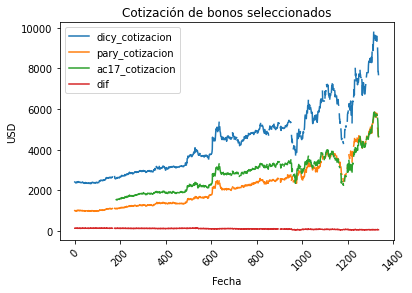

In [ ]:
df_filtrado.plot(title = "Cotización de bonos seleccionados", rot = 45, xlabel = "Fecha", ylabel = "USD")

Podemos hacer las visualizaciones también con matplotlib. Combinemos en una misma impresión distintos tipos de gráficos, por ejemplo, uno de lineas, puntos o [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) y de [barras](). Para modificar los colores también tenemos que revisar la [documentación](https://matplotlib.org/stable/gallery/color/named_colors.html). Existen varias formas de especificar los [colores](https://matplotlib.org/stable/tutorials/colors/colors.html); a continuación lo indicaremos por medio de strings. 

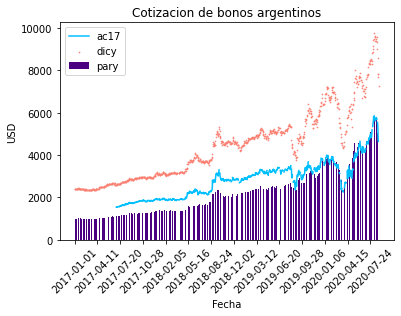

In [ ]:
import matplotlib.pyplot as plt

# df_filtrado.set_index("indice_tiempo", inplace=True)
plt.scatter(df_filtrado.index, df_filtrado.dicy_cotizacion, label= "dicy", s = 0.4, c = "salmon")
plt.bar(df_filtrado.index, df_filtrado.pary_cotizacion , label= "pary", color = "indigo")
plt.plot(df_filtrado.index, df_filtrado.ac17_cotizacion , label= "ac17", color = "deepskyblue")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.title("Cotizacion de bonos argentinos")
plt.legend(loc = "best")
plt.xticks(df_filtrado.index[::100],  rotation=45)
plt.show()

En cierto punto, el hecho de tener traspuesto los datos facilita la manipulación en pos de la visualización de los datos.

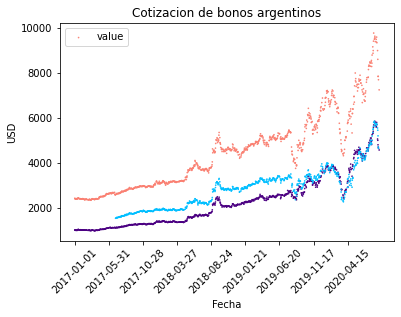

In [ ]:
fig, ax = plt.subplots() #para graficar varios suplots, no utilizado esta vez

df_melteado = df_filtrado.reset_index().melt(id_vars="indice_tiempo", var_name="bono")
data_plot = df_melteado[df_melteado["bono"] != "dif"]

colors = {'dicy_cotizacion': "salmon", 'pary_cotizacion': "indigo", 'ac17_cotizacion': "deepskyblue"}

ax.scatter(x = "indice_tiempo", y= "value",  c =  data_plot["bono"].map(colors), data = data_plot, s = 0.4)
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.title("Cotizacion de bonos argentinos")
plt.legend(loc = "best")
plt.xticks(df_filtrado.index[::150],  rotation=45)
plt.show()